<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/The%20Market's%20Not%20Normal/The_Variance_is_Not_Stationary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Let's Talk About Heteroskedasticity
## Introduction
In previous writing on Medium, I exhibited simulations that showed that block-non-stationarity in the mean of a Normal distribution would lead to a unconditional (meaning unaware of the blocking) distribution of returns that exhibits "platykurtosis," or "thin tails." In addition, block-non-stationarity in the variance of a Normal distribution exhibits "leptokurtosis," or "fat tails," in the unconditional distribution. Since this is what we see in real financial data it is a possible candidate to model that data. Thus, a question of relevance is: empirically, does the data support the idea of non-stationarity in the variance? This notebook addresses that issue.

## Import the Standard Libary
I put everything I use "most of the time" into a python file called `my_library.py` which you must import into the workspace of this notebook to make the analysis execute. The file is available here: [`my_library.py`](https://github.com/Farmhouse121/Financial-Data-Science-in-Python/blob/main/The%20Market's%20Not%20Normal/my_library.py).

In [ ]:
from my_library import *

14:32:12 Starting...
14:32:12 Installing yfinance into Google notebook...
14:32:35 Installing arch into Google notebook...
14:32:50 Initialized.


## Read the Data from _Yahoo! Finance_
I'm going to use _Yahoo! Finance_ as a data source as it is publicly available and easy to access via the `yfinance` package. You could substitute other vendors, if you have access to them.

In [ ]:
df,name=download(ticker:='^GSPC',begin:='1928-01-27',end:=today('%Y-%m-%d')).dropna(),'S&P 500 Index'
df['Daily Return']=df['Adj Close'].pct_change()*hundred
df['Intraday Return']=df['Close']/df['Open']*hundred-hundred
df['Overnight Return']=(hundred+df["Daily Return"])/(hundred+df["Intraday Return"])*hundred-hundred
df.index=pd.DatetimeIndex(df.index).to_period('B')
df.dropna(inplace=True)
df.loc[df["Volume"]==0,"Volume"]=np.nan
nprint("\nDownloaded data for %s." % name)
display(df)

[*********************100%%**********************]  1 of 1 completed

14:32:52 
Downloaded data for S&P 500 Index.


,Open,High,Low,Close,Adj Close,Volume,Daily Return,Intraday Return,Overnight Return
Date,,,,,,,,,
1928-01-30,17.490000,17.490000,17.490000,17.490000,17.490000,NaN,-1.130587,0.000000,-1.130587
1928-01-31,17.570000,17.570000,17.570000,17.570000,17.570000,NaN,0.457404,0.000000,0.457404
1928-02-01,17.530001,17.530001,17.530001,17.530001,17.530001,NaN,-0.227655,0.000000,-0.227655
1928-02-02,17.629999,17.629999,17.629999,17.629999,17.629999,NaN,0.570442,0.000000,0.570442
1928-02-03,17.400000,17.400000,17.400000,17.400000,17.400000,NaN,-1.304592,0.000000,-1.304592
...,...,...,...,...,...,...,...,...,...
2024-06-06,5357.799805,5362.350098,5335.359863,5352.959961,5352.959961,3.609990e+09,-0.019982,-0.090333,0.070415
2024-06-07,5343.810059,5375.080078,5331.330078,5346.990234,5346.990234,3.692760e+09,-0.111522,0.059511,-0.170932
2024-06-10,5341.220215,5365.790039,5331.520020,5360.790039,5360.790039,3.622280e+09,0.258085,0.366392,-0.107912


## Compute Grouped Means and Variances
This code computes grouped means and variances and then executes the _F_ test on the variances of temporalilly adjacent groups. For maximal statistical rigor, once should not use the same year in two adjacent tests, which means skipping every other year. However, I don't compute a "whole data" statistic here and perform a test: this result goes into the bucket of "it's plainly true."

begin         end      middle      mean   variance sample  \
                                                                       
Year                                                                   
1928  1928-01-30  1928-12-31  1928-07-16  0.142928   0.902165    231   
1929  1929-01-02  1929-12-31  1929-07-02 -0.023030   5.518972    249   
1930  1930-01-02  1930-12-31  1930-07-02 -0.118062   3.078754    251   
1931  1931-01-02  1931-12-31  1931-07-02 -0.218345   6.866020    252   
1932  1932-01-04  1932-12-30  1932-07-01 -0.007653  11.365781    250   
...          ...         ...         ...       ...        ...    ...   
2020  2020-01-02  2020-12-31  2020-07-02  0.083217   4.704339    253   
2021  2021-01-04  2021-12-31  2021-07-02  0.097952   0.681002    252   
2022  2022-01-03  2022-12-30  2022-07-01 -0.074544   2.318887    251   
2023  2023-01-03  2023-12-29  2023-07-03  0.090210   0.680249    250   
2024  2024-01-02  2024-06-12  2024-03-22  0.115741   0.489528    113   

             F                          
     statistic       p Value  critical  
Year                                    
1928       NaN           NaN       NaN  
1929  6.117474  2.558182e-39  1.237897  
1930  0.557849  9.999977e-01  1.231838  
1931  2.230129  1.808801e-10  1.231036  
1932  1.655367  3.604395e-05  1.231201  
...        ...           ...       ...  
2020  7.621188  5.035750e-51  1.230527  
2021  0.144760  1.000000e+00  1.230466  
2022  3.405112  2.058730e-21  1.230975  
2023  0.293352  1.000000e+00  1.231487  
2024  0.719631  9.763722e-01  1.292964  

[97 rows x 9 columns]

14:32:54 Number of failing years 36 versus expected 4 at 95% confidence.


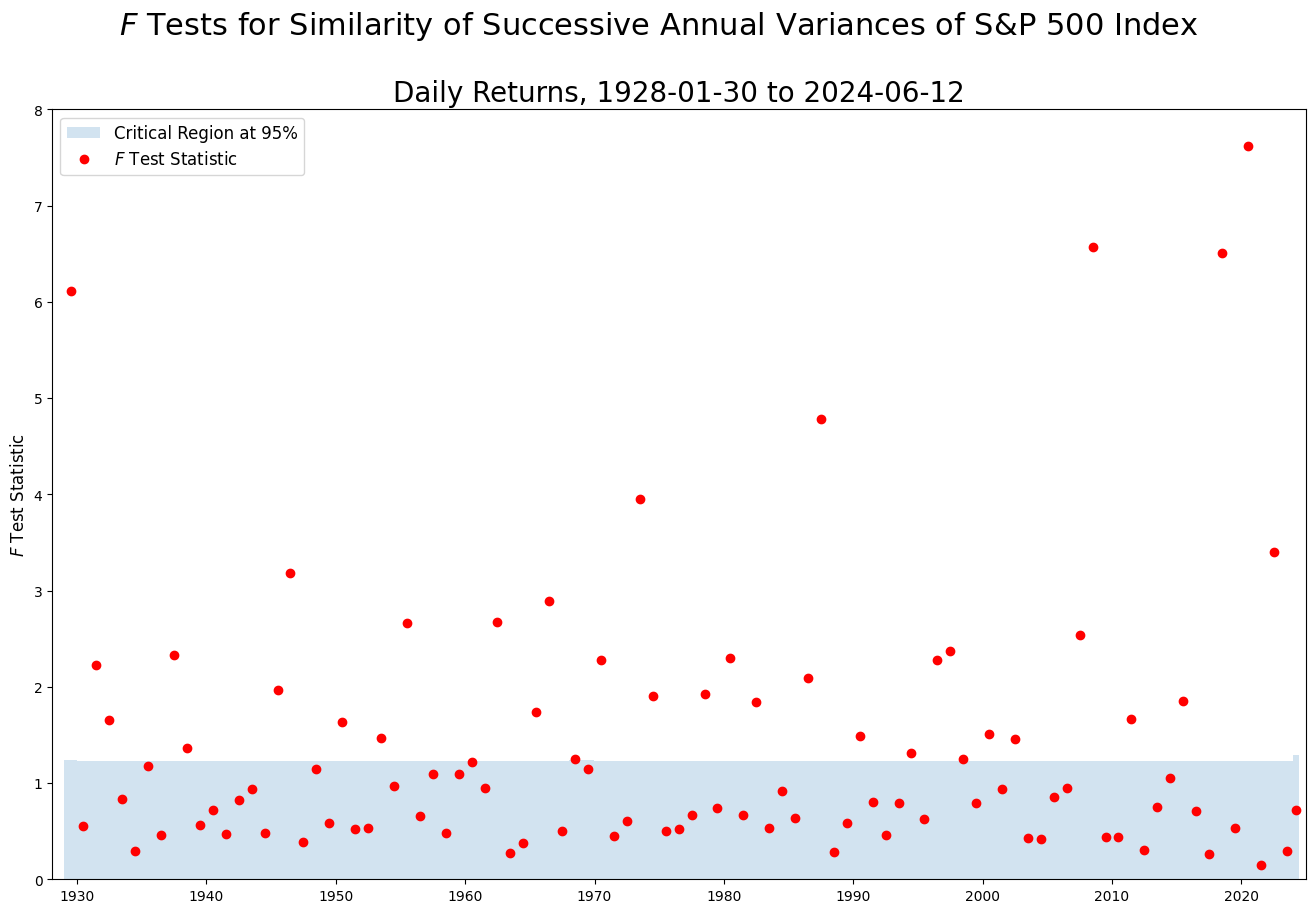

In [ ]:
from scipy.stats import f,t

# add fields to help with grouping
df['Year']=df.index.year
df['Date']=df.index

# aggregate by year
grouped=df.groupby('Year')
annual=pd.DataFrame({'Year':list(set(df.index.year))}).set_index('Year')
annual['begin']=grouped['Date'].min()
annual['end']=grouped['Date'].max()
annual['middle']=annual['begin']+(annual['end']-annual['begin']).apply(lambda x:x.n)//2
annual['mean']=grouped['Daily Return'].mean()
annual['variance']=grouped['Daily Return'].var()
annual['sample']=grouped['Daily Return'].count()

# statistics
annual[('F','statistic')]=annual['variance']/annual['variance'].shift()
annual[('F','p Value')]=f(annual['sample'],annual['sample'].shift()).sf(annual[('F','statistic')])
annual[('F','critical')]=f(annual['sample'],annual['sample'].shift()).isf(alpha:=five/hundred)

annual.columns=pd.MultiIndex.from_tuples(map(lambda x:x if isinstance(x,tuple) else (x,''),annual.columns))
display(annual)

# charting
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.stairs(annual[('F','critical')],[df.index[0].to_timestamp()]+list(annual['end'].apply(pd.Period.to_timestamp)),fill=True,alpha=0.2,label='Critical Region at %g%%' % ((one-alpha)*hundred))
plot.plot(annual['middle'].apply(pd.Period.to_timestamp),annual[('F','statistic')],'ro',label='$F$ Test Statistic')
plot.set_ylim(zero,None)
plot.set_xlim(df.index[0],(df.index[-1].asfreq('A-DEC')+1).to_timestamp())
figure.suptitle(title:="$F$ Tests for Similarity of Successive Annual Variances of %s" % name,fontsize=22)
plot.set_title(subtitle:='Daily Returns, %s to %s' % (df.index[0],df.index[-1]),fontsize=20)
plot.legend(fontsize=12)
plot.set_ylabel('$F$ Test Statistic',fontsize=12)
figure.savefig(title.replace('$','')+'.png',dpi=300,bbox_inches='tight')

# summary
nprint("Number of failing years %d versus expected %d at %g%% confidence." % (annual[annual[('F','statistic')]>annual[('F','critical')]].shape[0],
                                                           alpha*annual[('F','statistic')].count(),(one-alpha)*hundred))

## Repeat the Procedure the the Brown-Forsythe Test and _t_ Test
We then repeat the analysis using the Brown-Forsythe Test for equal variance and the Welch test for equal means with unequal variances. This requires looping through the data and grouping it. The samne comment on effective degrees of freedom applies.

  0%|          | 0/96 [00:00<?, ?it/s]

W                       t          
      statistic       p Value statistic   p Value
Year                                             
1929  29.867621  7.459788e-08  1.027846  0.304770
1930   0.404471  5.250814e-01  0.512150  0.608792
1931  16.427645  5.858096e-05  0.504501  0.614163
1932  14.984031  1.228011e-04 -0.781366  0.434981
1933   3.306400  6.962092e-02 -0.705418  0.480887
...         ...           ...       ...       ...
2020  46.826658  2.262427e-11  0.141923  0.887231
2021  39.655183  6.611919e-10 -0.100974  0.919634
2022  65.372271  4.694393e-15  1.578556  0.115260
2023  61.195971  3.104123e-14 -1.506532  0.132750
2024   3.216771  7.372410e-02 -0.303998  0.761380

[96 rows x 4 columns]

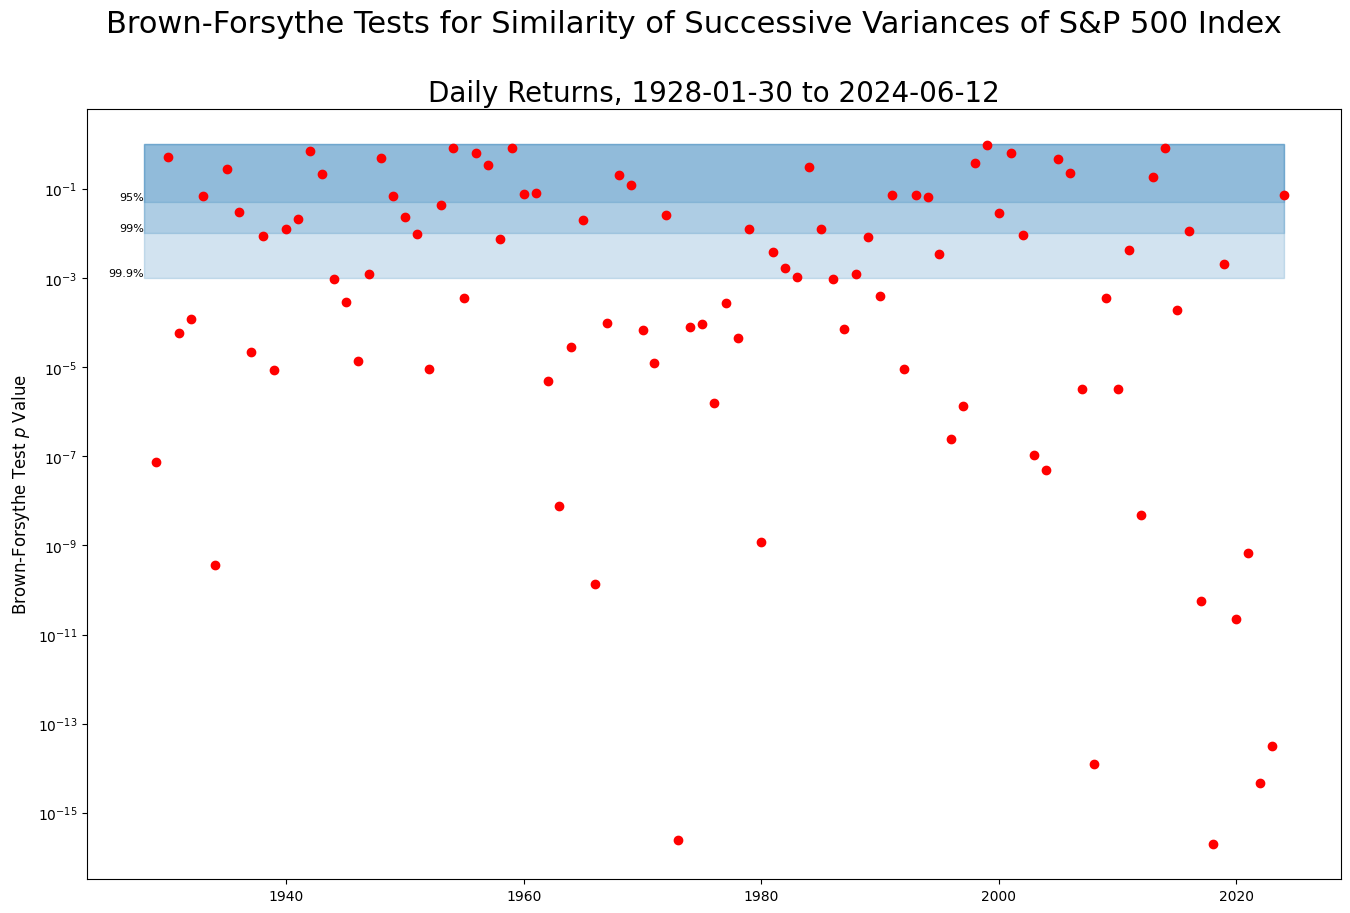

In [ ]:
from scipy.stats import levene,ttest_ind

for year in (p:=tqdm(annual.index[1:])):
    p.set_description(str(year))
    annual.loc[year,("W",'statistic')]=(l:=levene(df.loc[df.index.year==year-1,"Daily Return"],df.loc[df.index.year==year,"Daily Return"],center='median')).statistic
    annual.loc[year,("W",'p Value')]=l.pvalue
    annual.loc[year,("t",'statistic')]=(t:=ttest_ind(df.loc[df.index.year==year-1,"Daily Return"],df.loc[df.index.year==year,"Daily Return"],equal_var=False)).statistic
    annual.loc[year,("t","p Value")]=t.pvalue

display(annual[["W","t"]].dropna())

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.plot(annual.index,annual[('W','p Value')],'ro')
plot.set_yscale('log')

for alpha in five/hundred,one/hundred,one/thousand:
    #plot.axhline(alpha,color='black',alpha=0.2,linestyle=':')
    plot.fill_between(annual.index,one,alpha,color='C0',alpha=0.2)
    plot.text(annual.index[0],alpha,"%g%%" % ((one-alpha)*hundred),ha='right',va='bottom',fontsize=8)

figure.suptitle(title:="Brown-Forsythe Tests for Similarity of Successive Variances of %s" % name,fontsize=22)
plot.set_title(subtitle,fontsize=20)
plot.set_ylabel('Brown-Forsythe Test $p$ Value',fontsize=12)
figure.savefig(title.replace('$','')+'.png',dpi=300,bbox_inches='tight')

14:33:05 Number of failing years 7 versus expected 4.8 at 95% confidence.
14:33:05 Number of failing years 2 versus expected 0.96 at 99% confidence.
14:33:05 Number of failing years 0 versus expected 0.096 at 99.9% confidence.


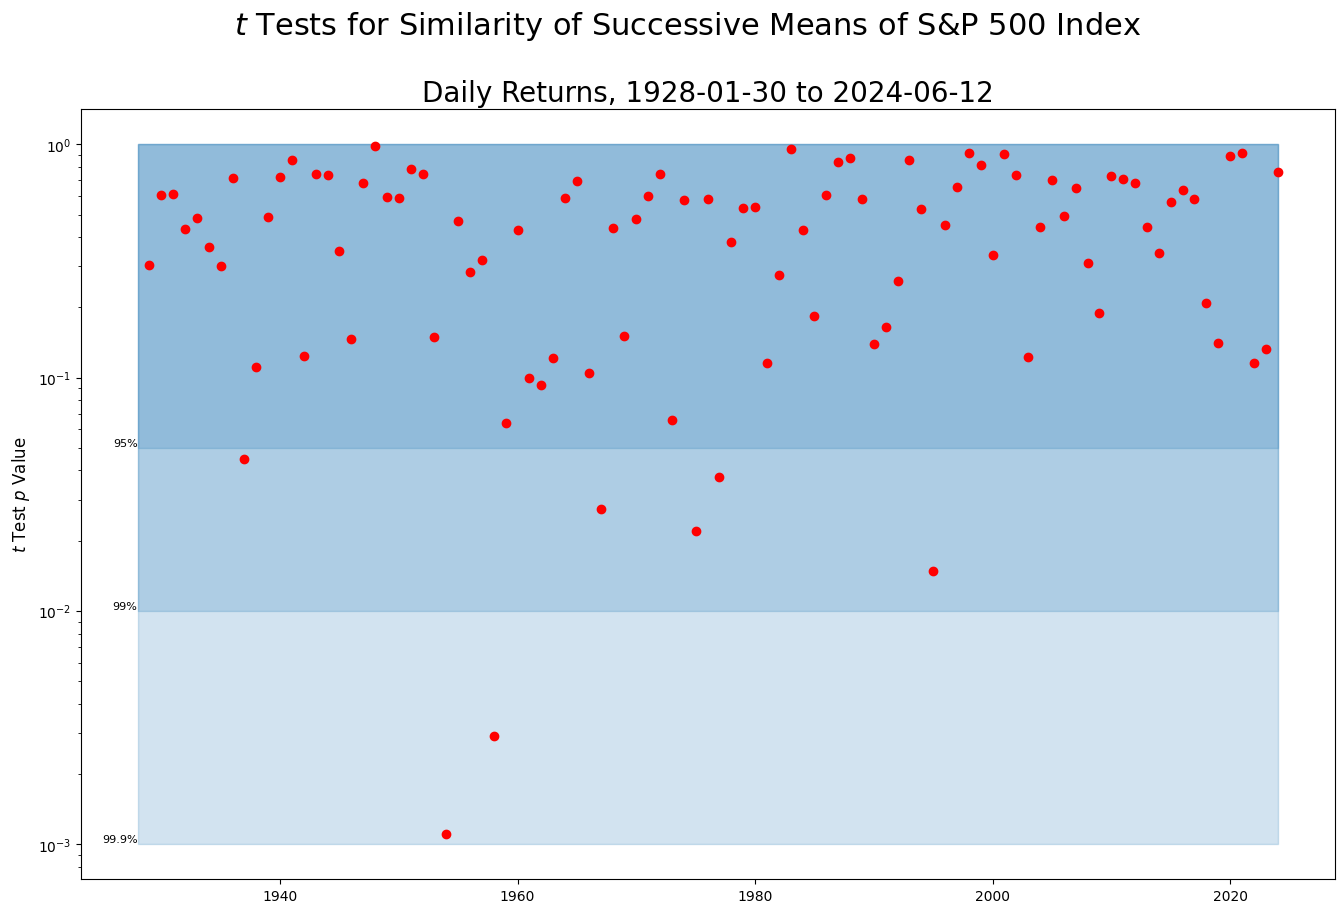

In [ ]:
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.plot(annual.index,annual[('t','p Value')],'ro')
plot.set_yscale('log')

for alpha in five/hundred,one/hundred,one/thousand:
    plot.fill_between(annual.index,one,alpha,color='C0',alpha=0.2)
    plot.text(annual.index[0],alpha,"%g%%" % ((one-alpha)*hundred),ha='right',va='bottom',fontsize=8)
    nprint("Number of failing years %d versus expected %g at %g%% confidence." % (annual[annual[('t','p Value')]<alpha].shape[0],
                                                           alpha*annual[('t','statistic')].count(),(one-alpha)*hundred))

figure.suptitle(title:="$t$ Tests for Similarity of Successive Means of %s" % name,fontsize=22)
plot.set_title(subtitle,fontsize=20)
plot.set_ylabel('$t$ Test $p$ Value',fontsize=12)
figure.savefig(title.replace('$','')+'.png',dpi=300,bbox_inches='tight')